# now we will do unsupervised  task


Unsupervised Task: Segment tech employees into distinct clusters based on mental health indicators to aid in tailored HR policies

In [297]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [298]:
st= pd.read_csv('cleaned_survey2.csv')
st.describe()
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1251 non-null   int64  
 1   Timestamp                  1251 non-null   object 
 2   Age                        1251 non-null   int64  
 3   Gender                     1251 non-null   object 
 4   Country                    1251 non-null   object 
 5   state                      1251 non-null   object 
 6   self_employed              1251 non-null   object 
 7   family_history             1251 non-null   object 
 8   treatment                  1251 non-null   object 
 9   work_interfere             1251 non-null   object 
 10  no_employees               1251 non-null   object 
 11  remote_work                1251 non-null   object 
 12  tech_company               1251 non-null   object 
 13  benefits                   1251 non-null   objec

In [299]:
st.drop(['Timestamp', 'comments','no_employees','Gender',], axis=1, inplace=True)

In [300]:
st.isnull().sum()


Unnamed: 0                   0
Age                          0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
cleaned_employees            8
Gender_clean                 0
dtype: int64

In [301]:
st['cleaned_employees'].fillna(st['cleaned_employees'].mode()[0], inplace=True)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\401652079.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  st['cleaned_employees'].fillna(st['cleaned_employees'].mode()[0], inplace=True)


In [302]:
st.isnull().sum()


Unnamed: 0                   0
Age                          0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
cleaned_employees            0
Gender_clean                 0
dtype: int64

# feature selection  and preprocessing
## we will select the features we want to capture
1. personal history and treatment experience 
2. workplace attitudes and perceptions 
3. Company culture and support systems
4. Communication comfort levels 

In [303]:
features= [
    'family_history',# Personal risk factors
    'treatment',
    'work_interfere',
    'remote_work',
    'tech_company',
    'benefits',
    'care_options',
    'wellness_program',
    'seek_help',
    'anonymity',
    'leave',
    'mental_health_consequence',
    'phys_health_consequence',
    'coworkers',
    'supervisor',
    'mental_health_interview',
    'phys_health_interview',
    'mental_vs_physical',
    'obs_consequence'
]
st_model= st[features].copy()
print(f"Selected {len(features)} features for analysis.")
print(f"Dataset shape: {st_model.shape}")

Selected 19 features for analysis.
Dataset shape: (1251, 19)


In [304]:
leave_map={
    'unknown':0,
    'Very difficult':1,
    'Somewhat difficult':2,
    'Somewhat easy':3,
    'Very easy':4
}
interfere_map={
    'Unknown':0,
    'Never':1,
    'Rarely':2,
    'Sometimes':3,
    'Often':4
}
# Applying Mappings 
st_model['leave'] = st_model['leave'].map(leave_map)
st_model['work_interfere'] = st_model['work_interfere'].map(interfere_map)
print("Original encoding completed for'leave' and 'work_interfere' features")
print(f"Leave Mappings: {leave_map}")
print(f"Work Interfere Mappings: {interfere_map}")



Original encoding completed for'leave' and 'work_interfere' features
Leave Mappings: {'unknown': 0, 'Very difficult': 1, 'Somewhat difficult': 2, 'Somewhat easy': 3, 'Very easy': 4}
Work Interfere Mappings: {'Unknown': 0, 'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4}


In [305]:
# one hot encoding for categorical Features except leave and work_interfere
categorical_features = st_model.columns.drop(['leave', 'work_interfere'])
st_model_encoded= pd.get_dummies(
    st_model, 
    columns=categorical_features, 
    drop_first=False
)
print(f"One-hot encoding applied to {len(features)} categorical features.") 
print(f"Encoded features: {st_model_encoded.shape[1]}")
print(f"Final preprocessed shape: {st_model_encoded.shape}")

print(f"\n First 5 encoded features names:")
print(st_model_encoded.columns[:5].tolist())


One-hot encoding applied to 19 categorical features.
Encoded features: 48
Final preprocessed shape: (1251, 48)

 First 5 encoded features names:
['work_interfere', 'leave', 'family_history_No', 'family_history_Yes', 'treatment_No']


In [357]:
st_model_encoded

,work_interfere,leave,family_history_No,family_history_Yes,treatment_No,treatment_Yes,remote_work_No,remote_work_Yes,tech_company_No,tech_company_Yes,...,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,mental_vs_physical_unknown,obs_consequence_No,obs_consequence_Yes
0,4,3,True,False,False,True,True,False,False,True,...,True,False,True,False,False,False,True,False,True,False
1,2,0,True,False,True,False,True,False,True,False,...,True,False,False,True,False,False,False,True,True,False
2,2,2,True,False,True,False,True,False,False,True,...,False,True,False,False,True,True,False,False,True,False
3,4,2,False,True,False,True,True,False,False,True,...,False,False,True,False,False,True,False,False,False,True
4,1,0,True,False,True,False,False,True,False,True,...,False,True,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,3,3,True,False,False,True,True,False,False,True,...,True,False,False,True,False,False,False,True,True,False
1247,4,2,False,True,False,True,False,True,False,True,...,True,False,False,True,False,False,True,False,True,False
1248,3,2,False,True,False,True,True,False,False,True,...,True,False,False,True,False,True,False,False,True,False
1249,3,0,True,False,True,False,False,True,False,True,...,True,False,False,True,False,True,False,False,True,False


dimensionality reduction
# 1.PCA(Principle component analysis)
# 2.t-SNE(t-distributed Stochastic Neigbour Embedding)
# 3.UMAP ( uniform manifold approximation and projection)

In [306]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(st_model_encoded)

print(f"\nScaled features shape: {X_scaled.shape}")
print(f"Mean: {X_scaled.mean():.6f}, Std: {X_scaled.std():.6f}")


Scaled features shape: (1251, 48)
Mean: -0.000000, Std: 1.000000


In [307]:
st_model_encoded.isnull().sum()


work_interfere                         0
leave                                  0
family_history_No                      0
family_history_Yes                     0
treatment_No                           0
treatment_Yes                          0
remote_work_No                         0
remote_work_Yes                        0
tech_company_No                        0
tech_company_Yes                       0
benefits_No                            0
benefits_Yes                           0
benefits_unknown                       0
care_options_No                        0
care_options_Yes                       0
care_options_unknown                   0
wellness_program_No                    0
wellness_program_Yes                   0
wellness_program_unknown               0
seek_help_No                           0
seek_help_Yes                          0
seek_help_unknown                      0
anonymity_No                           0
anonymity_Yes                          0
anonymity_unknow

In [308]:
st['leave'].unique


<bound method Series.unique of 0            Somewhat easy
1                  unknown
2       Somewhat difficult
3       Somewhat difficult
4                  unknown
               ...        
1246         Somewhat easy
1247    Somewhat difficult
1248    Somewhat difficult
1249               unknown
1250               unknown
Name: leave, Length: 1251, dtype: object>

# pca technique

In [309]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap



# PCA
X_pca= PCA(n_components=2,random_state=42).fit_transform(X_scaled)
#t-sne
X_tsne= TSNE(n_components=2, perplexity=40, random_state=42).fit_transform(X_scaled)
X_umap= umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
).fit_transform(X_scaled)

C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


# VISUALIZING THE dimensionality reduction results

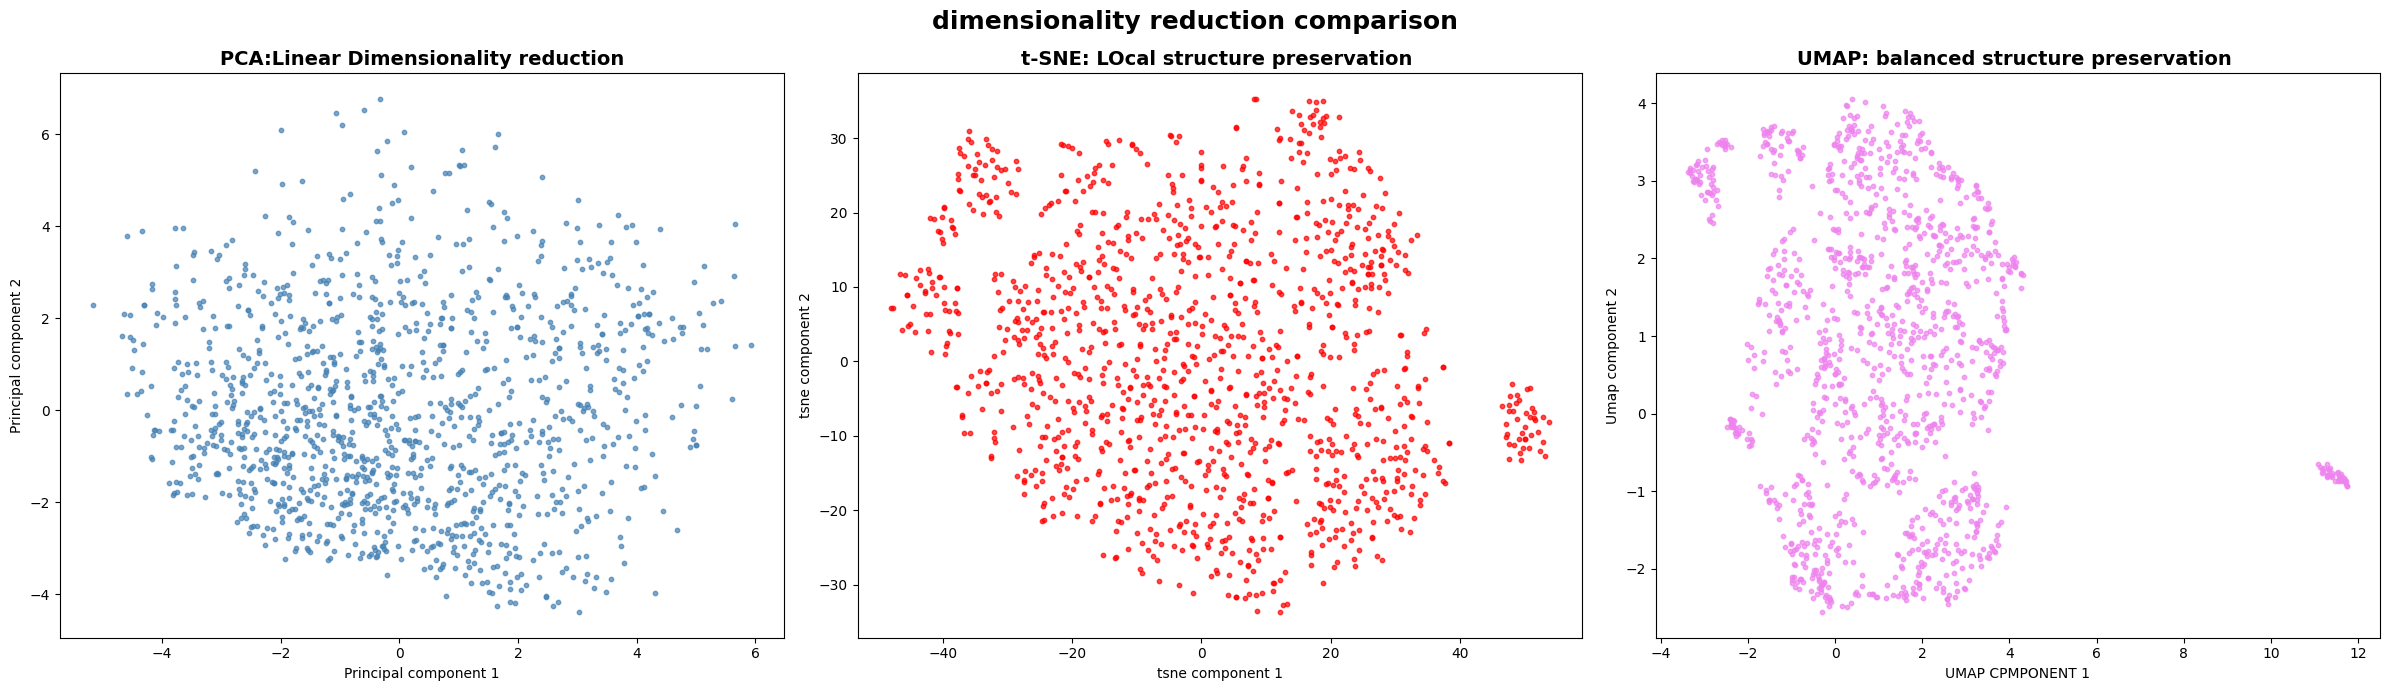

In [310]:
fig, (ax1, ax2, ax3)= plt.subplots(1,3 ,figsize=(24,7))
# PCA visualization
ax1.scatter(X_pca[:,0],X_pca[:,1], s=10,alpha=0.7,c='steelblue')
ax1.set_title('PCA:Linear Dimensionality reduction', fontsize=14, fontweight='bold')
ax1.set_xlabel("Principal component 1")
ax1.set_ylabel('Principal component 2')
# t-sne visualization 
ax2.scatter(X_tsne[:,0], X_tsne[:,1],s=10, alpha=0.7, c='red')
ax2.set_title('t-SNE: LOcal structure preservation ',fontsize=14, fontweight='bold')
ax2.set_xlabel("tsne component 1")
ax2.set_ylabel('tsne component 2')
# Umap visualization
ax3.scatter(X_umap[:,0],X_umap[:,1], s=10,alpha=0.7,c='violet')
ax3.set_title('UMAP: balanced structure preservation ',fontsize=14, fontweight='bold')
ax3.set_xlabel("UMAP CPMPONENT 1")
ax3.set_ylabel('Umap component 2')
plt.suptitle('dimensionality reduction comparison' , fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


# clustering analysis

applying clustering analysis to find distinct personas in our data 
# determine the optimal number of clusters using silhouette analysis
# compare multiple clustering algorithems :
   **1.k means**
   **2.agglomerative hierarchial clustering**
   **3.DBSCAN- density based clustering**


In [358]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score


silhouette_scores=[]
k_range=range(3,20)
for k  in k_range :
    kmeans= KMeans(n_clusters=k,random_state=42,n_init=10)
    labels= kmeans.fit_predict(X_umap)
    score= silhouette_score(X_umap,labels)
    silhouette_scores.append(score)
    print(f"  k={k}:Silhouette Score={score:.4f}")
optimal_k=k_range[np.argmax(silhouette_scores)]
best_score= max(silhouette_scores)
print(f"\n Optimal number of clusters :{optimal_k}")
print(f"best silhoutte score:{best_score:.4f}")

  k=3:Silhouette Score=0.3780
  k=4:Silhouette Score=0.4089
  k=5:Silhouette Score=0.4117
  k=6:Silhouette Score=0.4079
  k=7:Silhouette Score=0.4265
  k=8:Silhouette Score=0.4478
  k=9:Silhouette Score=0.4377
  k=10:Silhouette Score=0.4384
  k=11:Silhouette Score=0.4410
  k=12:Silhouette Score=0.4485
  k=13:Silhouette Score=0.4440
  k=14:Silhouette Score=0.4612
  k=15:Silhouette Score=0.4514
  k=16:Silhouette Score=0.4442
  k=17:Silhouette Score=0.4557
  k=18:Silhouette Score=0.4685
  k=19:Silhouette Score=0.4472

 Optimal number of clusters :18
best silhoutte score:0.4685


In [359]:
print(f"Applying clustering algorithems with k={optimal_k}")
#Kmeans clustering
kmeans= KMeans(n_clusters=optimal_k, random_state=42,n_init=10)
kmeans_labels=kmeans.fit_predict(X_umap)
# Agglomerative clustering
agg=AgglomerativeClustering(n_clusters=optimal_k)
agg_labels=agg.fit_predict(X_umap)
# Dbscan Clustering
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan_labels=dbscan.fit_predict(X_umap)


Applying clustering algorithems with k=18


In [360]:
print('Clustering performance evaluation')
#K-means evaluation
kmeans_score= silhouette_score(X_umap, kmeans_labels )
print(f"K-means Silhouette  Score:{kmeans_score:.4f}")
print(f'K-means clusters :{ len(np.unique(kmeans_labels))}')

# Agglomerative evaluation
agg_score= silhouette_score(X_umap, agg_labels)
print(f"agglomerative Silhouette  Score:{agg_score:.4f}")
print(f'agglomerative clusters :{ len(np.unique(agg_labels))}')

# DBSCAN
dbscan_mask= dbscan_labels!=-1# excluding noise points
if np.sum(dbscan_mask)>0:
    dbscan_score=silhouette_score(X_umap[dbscan_mask],dbscan_labels[dbscan_mask])
    unique_dbscan=np.unique(dbscan_labels)
    n_clusters_dbscan=len(unique_dbscan[unique_dbscan!=-1])
    n_noise=np.sum(dbscan_labels== -1)

    print(f"DBSCAN Silhouette Score:{dbscan_score:.4f}")
    print(f"DBSCAN Clusters :{ n_clusters_dbscan}")
    print(f"DBSCAN NOISE:{n_noise}")
else:
    print('DBSCAN no clusters found ')


Clustering performance evaluation
K-means Silhouette  Score:0.4685
K-means clusters :18
agglomerative Silhouette  Score:0.4288
agglomerative clusters :18
DBSCAN Silhouette Score:0.3638
DBSCAN Clusters :3
DBSCAN NOISE:0


# this implies k means and agglomerative and k means both are doing good so going with kmeans

**comprehensive clustering visulaization**

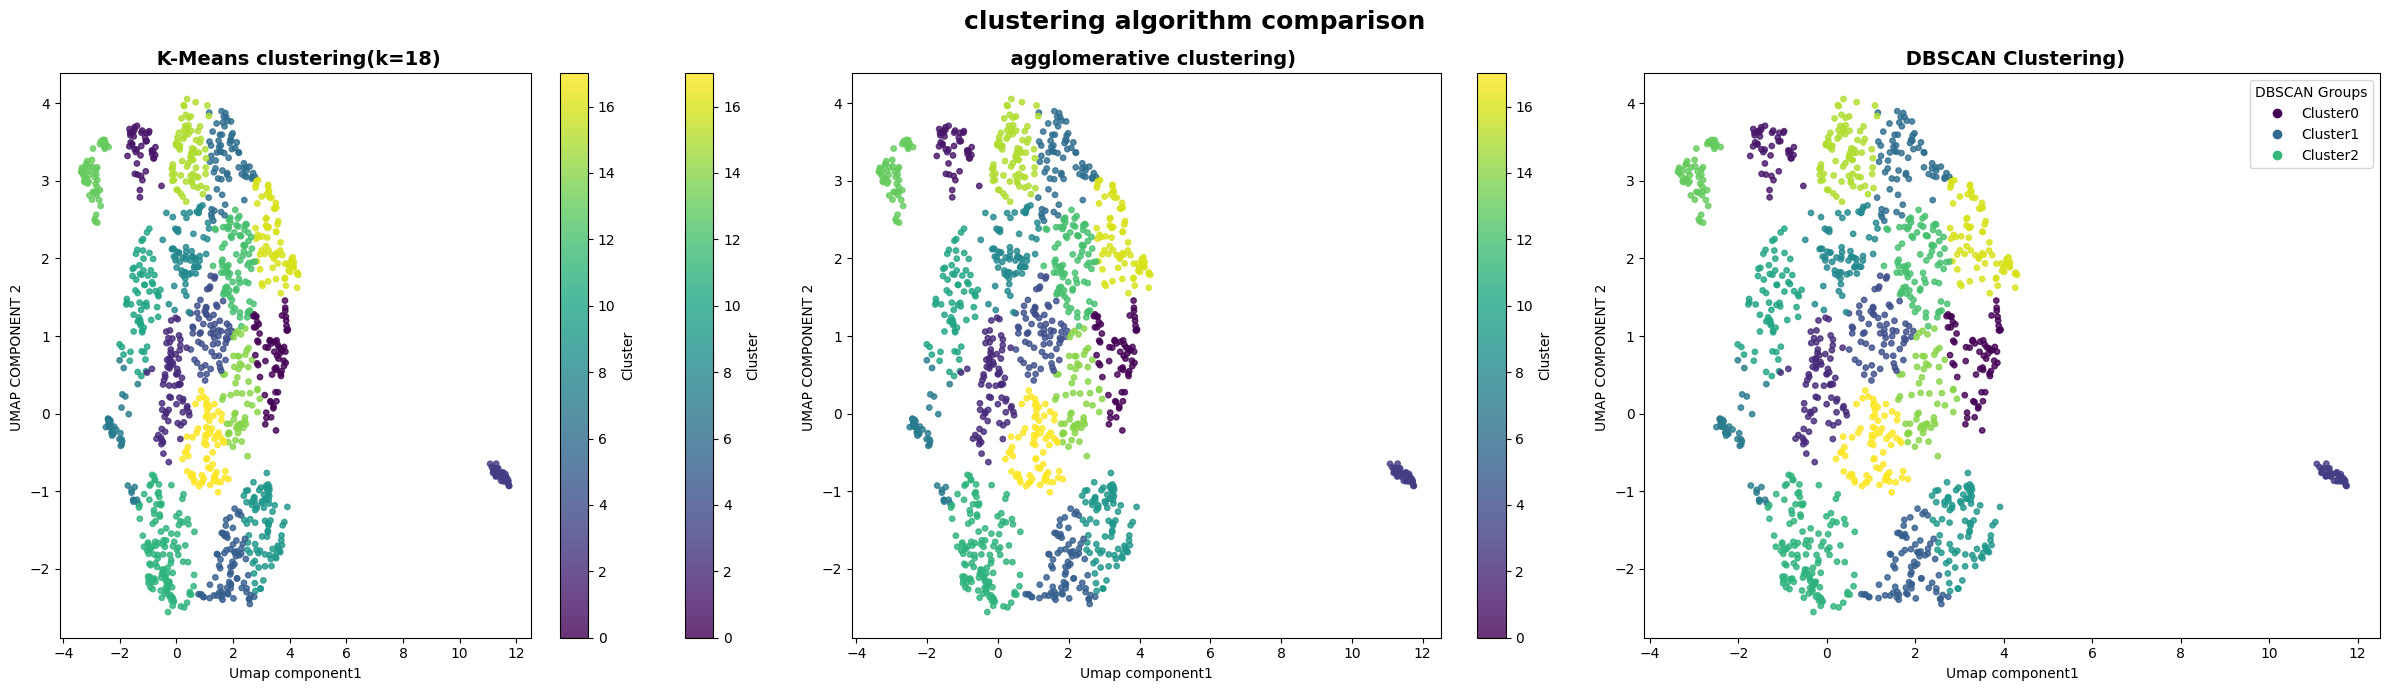

In [361]:
from matplotlib.lines import Line2D
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(24,7))
# kmeans visulaization
scatter1=ax1.scatter( X_umap[:,0] ,X_umap[:,1], c=kmeans_labels, cmap='viridis',s=15, alpha=0.8)
ax1.set_title(f" K-Means clustering(k={optimal_k})", fontsize=14, fontweight='bold')
ax1.set_xlabel('Umap component1')
ax1.set_ylabel('UMAP COMPONENT 2 ')
plt.colorbar(scatter1 ,ax=ax1,label='Cluster')

#AGGLOMERATIVE VISUALIZATION
scatter2=ax2.scatter( X_umap[:,0] ,X_umap[:,1], c=kmeans_labels, cmap='viridis',s=15, alpha=0.8)
ax2.set_title(f"  agglomerative clustering)", fontsize=14, fontweight='bold')
ax2.set_xlabel('Umap component1')
ax2.set_ylabel('UMAP COMPONENT 2 ')
plt.colorbar(scatter1 ,ax=ax2,label='Cluster')
# DBSCAN Visualization
scatter3=ax3.scatter( X_umap[:,0] ,X_umap[:,1], c=kmeans_labels, cmap='viridis',s=15, alpha=0.8)
ax3.set_title(f" DBSCAN Clustering)", fontsize=14, fontweight='bold')
ax3.set_xlabel('Umap component1')
ax3.set_ylabel('UMAP COMPONENT 2 ')
plt.colorbar(scatter1 ,ax=ax1,label='Cluster')
# create customnlegend for dbscan 
unique_labels= np.unique(dbscan_labels)
colors= [plt.cm.viridis(i/len(unique_labels))for i in range(len(unique_labels))]
handles=[Line2D([0],[0], marker='o',color='w', markerfacecolor=c , markersize=8)for c in colors]
legend_labels=[f"Cluster{l}"if l!=-1 else"NOISE" for l in unique_labels]
ax3.legend(handles,legend_labels,title='DBSCAN Groups', loc='upper right')
plt.suptitle('clustering algorithm comparison', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()



In [362]:
# Cluster in original space
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_scaled)


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


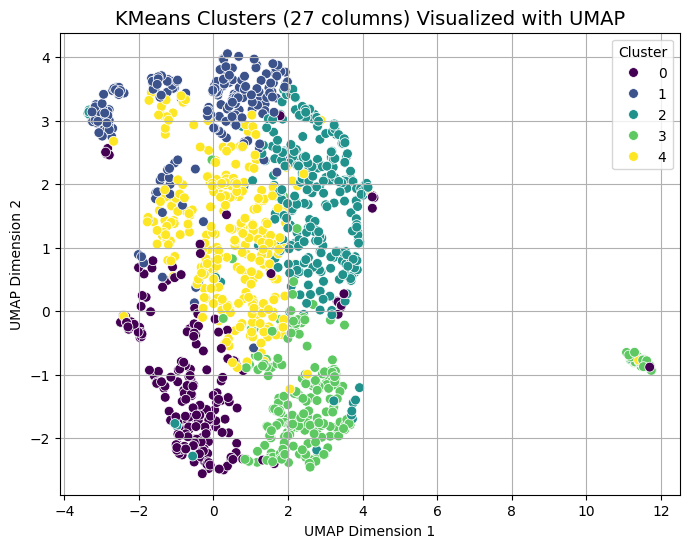

In [364]:



#  KMeans with chosen k (you can run silhouette before this to find best k)
kmeans = KMeans(n_clusters=5, random_state=42)  # change k as needed
labels = kmeans.fit_predict(X_scaled)

# Reduce dimensions to 2D for visualization
umap_reducer = umap.UMAP(random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

#  Plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_umap[:,0], 
    y=X_umap[:,1], 
    hue=labels, 
    palette='viridis', 
    s=50
)
plt.title("KMeans Clusters (27 columns) Visualized with UMAP", fontsize=14)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [316]:
st

,Unnamed: 0,Age,Country,state,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,cleaned_employees,Gender_clean
0,0,37,United States,IL,No,No,Yes,Often,No,Yes,...,No,No,Some of them,Yes,No,Maybe,Yes,No,15.0,Female
1,1,44,United States,IN,No,No,No,Rarely,No,No,...,unceratin,No,No,No,No,No,unknown,No,1001.0,Male
2,2,32,Canada,unknown,No,No,No,Rarely,No,Yes,...,No,No,Yes,Yes,Yes,Yes,No,No,15.0,Male
3,3,31,United Kingdom,unknown,No,Yes,Yes,Often,No,Yes,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,63.0,Male
4,4,31,United States,TX,No,No,No,Never,Yes,Yes,...,No,No,Some of them,Yes,Yes,Yes,unknown,No,300.0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1254,26,United Kingdom,unknown,No,No,Yes,Sometimes,No,Yes,...,No,No,Some of them,Some of them,No,No,unknown,No,15.0,Male
1247,1255,32,United States,IL,No,Yes,Yes,Often,Yes,Yes,...,No,No,Some of them,Yes,No,No,Yes,No,15.0,Male
1248,1256,34,United States,CA,No,Yes,Yes,Sometimes,No,Yes,...,Yes,Yes,No,No,No,No,No,No,15.0,Male
1249,1257,46,United States,NC,No,No,No,Sometimes,Yes,Yes,...,Yes,No,No,No,No,No,No,No,15.0,Female


In [317]:
st.drop('Unnamed: 0', axis=1, inplace=True)


In [318]:
st=st[st['tech_company']=='Yes']

In [319]:
st

,Age,Country,state,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,cleaned_employees,Gender_clean
0,37,United States,IL,No,No,Yes,Often,No,Yes,Yes,...,No,No,Some of them,Yes,No,Maybe,Yes,No,15.0,Female
2,32,Canada,unknown,No,No,No,Rarely,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,No,No,15.0,Male
3,31,United Kingdom,unknown,No,Yes,Yes,Often,No,Yes,No,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,63.0,Male
4,31,United States,TX,No,No,No,Never,Yes,Yes,Yes,...,No,No,Some of them,Yes,Yes,Yes,unknown,No,300.0,Male
5,33,United States,TN,No,Yes,No,Sometimes,No,Yes,Yes,...,No,No,Yes,Yes,No,Maybe,unknown,No,15.0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,29,United States,NC,No,Yes,Yes,Sometimes,Yes,Yes,Yes,...,Yes,No,Some of them,No,No,Maybe,No,No,15.0,Male
1246,26,United Kingdom,unknown,No,No,Yes,Sometimes,No,Yes,No,...,No,No,Some of them,Some of them,No,No,unknown,No,15.0,Male
1247,32,United States,IL,No,Yes,Yes,Often,Yes,Yes,Yes,...,No,No,Some of them,Yes,No,No,Yes,No,15.0,Male
1248,34,United States,CA,No,Yes,Yes,Sometimes,No,Yes,Yes,...,Yes,Yes,No,No,No,No,No,No,15.0,Male


In [320]:
st.drop(['Age', 'Country','state','phys_health_consequence','tech_company','phys_health_consequence','Gender_clean','cleaned_employees'], axis=1, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\1981274721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st.drop(['Age', 'Country','state','phys_health_consequence','tech_company','phys_health_consequence','Gender_clean','cleaned_employees'], axis=1, inplace=True)


In [321]:
st['self_employed'].value_counts()

self_employed
No     897
Yes    128
Name: count, dtype: int64

In [322]:
st.drop('self_employed', axis=1, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\1431576802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st.drop('self_employed', axis=1, inplace=True)


In [323]:
st

,family_history,treatment,work_interfere,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,No,Yes,Often,No,Yes,unknown,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,No,Maybe,Yes,No
2,No,No,Rarely,No,No,No,No,No,unknown,Somewhat difficult,No,Yes,Yes,Yes,Yes,No,No
3,Yes,Yes,Often,No,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,No,No,Never,Yes,Yes,No,unknown,unknown,unknown,unknown,No,Some of them,Yes,Yes,Yes,unknown,No
5,Yes,No,Sometimes,No,Yes,unknown,No,unknown,unknown,unknown,No,Yes,Yes,No,Maybe,unknown,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,Yes,Yes,Sometimes,Yes,Yes,Yes,Yes,No,Yes,unknown,Yes,Some of them,No,No,Maybe,No,No
1246,No,Yes,Sometimes,No,No,No,No,No,unknown,Somewhat easy,No,Some of them,Some of them,No,No,unknown,No
1247,Yes,Yes,Often,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,Some of them,Yes,No,No,Yes,No
1248,Yes,Yes,Sometimes,No,Yes,Yes,No,No,unknown,Somewhat difficult,Yes,No,No,No,No,No,No


In [324]:
# Encode all Yes/No columns to 1 and 0
binary_map={'Yes':1, 'No':0}
for col in st.columns:
    unique_val=st[col].dropna().unique()
    if set(unique_val).issubset({'Yes','No'}):
        st[col]=st[col].map(binary_map)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\1135116754.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[col]=st[col].map(binary_map)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\1135116754.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[col]=st[col].map(binary_map)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\1135116754.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [325]:
st

,family_history,treatment,work_interfere,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0,1,Often,0,Yes,unknown,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,No,Maybe,Yes,0
2,0,0,Rarely,0,No,No,No,No,unknown,Somewhat difficult,No,Yes,Yes,Yes,Yes,No,0
3,1,1,Often,0,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,Maybe,Maybe,No,1
4,0,0,Never,1,Yes,No,unknown,unknown,unknown,unknown,No,Some of them,Yes,Yes,Yes,unknown,0
5,1,0,Sometimes,0,Yes,unknown,No,unknown,unknown,unknown,No,Yes,Yes,No,Maybe,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,1,1,Sometimes,1,Yes,Yes,Yes,No,Yes,unknown,Yes,Some of them,No,No,Maybe,No,0
1246,0,1,Sometimes,0,No,No,No,No,unknown,Somewhat easy,No,Some of them,Some of them,No,No,unknown,0
1247,1,1,Often,1,Yes,Yes,No,No,Yes,Somewhat difficult,No,Some of them,Yes,No,No,Yes,0
1248,1,1,Sometimes,0,Yes,Yes,No,No,unknown,Somewhat difficult,Yes,No,No,No,No,No,0


In [326]:
st['obs_consequence']=st['obs_consequence'].apply(lambda x:1-x)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\3558712918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['obs_consequence']=st['obs_consequence'].apply(lambda x:1-x)


In [327]:
st

,family_history,treatment,work_interfere,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0,1,Often,0,Yes,unknown,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,No,Maybe,Yes,1
2,0,0,Rarely,0,No,No,No,No,unknown,Somewhat difficult,No,Yes,Yes,Yes,Yes,No,1
3,1,1,Often,0,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,Maybe,Maybe,No,0
4,0,0,Never,1,Yes,No,unknown,unknown,unknown,unknown,No,Some of them,Yes,Yes,Yes,unknown,1
5,1,0,Sometimes,0,Yes,unknown,No,unknown,unknown,unknown,No,Yes,Yes,No,Maybe,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,1,1,Sometimes,1,Yes,Yes,Yes,No,Yes,unknown,Yes,Some of them,No,No,Maybe,No,1
1246,0,1,Sometimes,0,No,No,No,No,unknown,Somewhat easy,No,Some of them,Some of them,No,No,unknown,1
1247,1,1,Often,1,Yes,Yes,No,No,Yes,Somewhat difficult,No,Some of them,Yes,No,No,Yes,1
1248,1,1,Sometimes,0,Yes,Yes,No,No,unknown,Somewhat difficult,Yes,No,No,No,No,No,1


In [328]:
mental_health_consequence_map={
    'No':1,
    'Maybe':0.5,
    'Yes': 0
}
st['mental_health_consequence']=st['mental_health_consequence'].map(mental_health_consequence_map)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\670678500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['mental_health_consequence']=st['mental_health_consequence'].map(mental_health_consequence_map)


In [329]:
extended_map= {
    'Yes':1,
    'No':0,
    "Don't know" :0.5,
    'Not sure':0.5,
    'Maybe':0.5,
    'Some of them': 0.5
}
for col in st.columns:
    unique_vals=st[col].dropna().unique()
    if set(unique_vals).issubset({'Yes','No',"Don't know", "Not sure",'Maybe','Some of them'}):
        st[col]=st[col].map(extended_map)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\2686972705.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[col]=st[col].map(extended_map)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\2686972705.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[col]=st[col].map(extended_map)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\2686972705.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [330]:
st

,family_history,treatment,work_interfere,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0,1,Often,0,Yes,unknown,No,Yes,Yes,Somewhat easy,1.0,0.5,1.0,0.0,0.5,Yes,1
2,0,0,Rarely,0,No,No,No,No,unknown,Somewhat difficult,1.0,1.0,1.0,1.0,1.0,No,1
3,1,1,Often,0,No,Yes,No,No,No,Somewhat difficult,0.0,0.5,0.0,0.5,0.5,No,0
4,0,0,Never,1,Yes,No,unknown,unknown,unknown,unknown,1.0,0.5,1.0,1.0,1.0,unknown,1
5,1,0,Sometimes,0,Yes,unknown,No,unknown,unknown,unknown,1.0,1.0,1.0,0.0,0.5,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,1,1,Sometimes,1,Yes,Yes,Yes,No,Yes,unknown,0.0,0.5,0.0,0.0,0.5,No,1
1246,0,1,Sometimes,0,No,No,No,No,unknown,Somewhat easy,1.0,0.5,0.5,0.0,0.0,unknown,1
1247,1,1,Often,1,Yes,Yes,No,No,Yes,Somewhat difficult,1.0,0.5,1.0,0.0,0.0,Yes,1
1248,1,1,Sometimes,0,Yes,Yes,No,No,unknown,Somewhat difficult,0.0,0.0,0.0,0.0,0.0,No,1


In [331]:
leave_map={
    'unknown':0.1,
    'Very difficult':0,
    'Somewhat difficult':0.25,
    'Somewhat easy':0.75,
    'Very easy':1
}
st['leave'] = st['leave'].map(leave_map)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\2699251142.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['leave'] = st['leave'].map(leave_map)


In [332]:
st['work_interfere'].value_counts()

work_interfere
Sometimes    602
Never        177
Rarely       137
Often        109
Name: count, dtype: int64

In [333]:
st['work_interfere'].isna().sum()

np.int64(0)

In [334]:
mapping={
    'Never':0.0,
    'Rarely':1/3,
    'Sometimes':2/3,
    'Often': 1.0
}
st['work_interfere']=st['work_interfere'].map(mapping)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\1176400387.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['work_interfere']=st['work_interfere'].map(mapping)


In [335]:
st

,family_history,treatment,work_interfere,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0,1,1.000000,0,Yes,unknown,No,Yes,Yes,0.75,1.0,0.5,1.0,0.0,0.5,Yes,1
2,0,0,0.333333,0,No,No,No,No,unknown,0.25,1.0,1.0,1.0,1.0,1.0,No,1
3,1,1,1.000000,0,No,Yes,No,No,No,0.25,0.0,0.5,0.0,0.5,0.5,No,0
4,0,0,0.000000,1,Yes,No,unknown,unknown,unknown,0.10,1.0,0.5,1.0,1.0,1.0,unknown,1
5,1,0,0.666667,0,Yes,unknown,No,unknown,unknown,0.10,1.0,1.0,1.0,0.0,0.5,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,1,1,0.666667,1,Yes,Yes,Yes,No,Yes,0.10,0.0,0.5,0.0,0.0,0.5,No,1
1246,0,1,0.666667,0,No,No,No,No,unknown,0.75,1.0,0.5,0.5,0.0,0.0,unknown,1
1247,1,1,1.000000,1,Yes,Yes,No,No,Yes,0.25,1.0,0.5,1.0,0.0,0.0,Yes,1
1248,1,1,0.666667,0,Yes,Yes,No,No,unknown,0.25,0.0,0.0,0.0,0.0,0.0,No,1


In [336]:
binary_map = {'Yes': 1, 'No': 0}
st['benefits']=st['benefits'].map(binary_map)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\1227635186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['benefits']=st['benefits'].map(binary_map)


In [337]:
ternary_map = {'Yes': 1, 'No': 0, 'unknown': 0.3}
cols_to_map= ['care_options','wellness_program','seek_help','anonymity','mental_vs_physical']
for col in cols_to_map:
    st[col] = st[col].map(ternary_map)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\1525975610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[col] = st[col].map(ternary_map)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\1525975610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[col] = st[col].map(ternary_map)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\1525975610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [338]:
st

,family_history,treatment,work_interfere,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0,1,1.000000,0,1.0,0.3,0.0,1.0,1.0,0.75,1.0,0.5,1.0,0.0,0.5,1.0,1
2,0,0,0.333333,0,0.0,0.0,0.0,0.0,0.3,0.25,1.0,1.0,1.0,1.0,1.0,0.0,1
3,1,1,1.000000,0,0.0,1.0,0.0,0.0,0.0,0.25,0.0,0.5,0.0,0.5,0.5,0.0,0
4,0,0,0.000000,1,1.0,0.0,0.3,0.3,0.3,0.10,1.0,0.5,1.0,1.0,1.0,0.3,1
5,1,0,0.666667,0,1.0,0.3,0.0,0.3,0.3,0.10,1.0,1.0,1.0,0.0,0.5,0.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,1,1,0.666667,1,1.0,1.0,1.0,0.0,1.0,0.10,0.0,0.5,0.0,0.0,0.5,0.0,1
1246,0,1,0.666667,0,0.0,0.0,0.0,0.0,0.3,0.75,1.0,0.5,0.5,0.0,0.0,0.3,1
1247,1,1,1.000000,1,1.0,1.0,0.0,0.0,1.0,0.25,1.0,0.5,1.0,0.0,0.0,1.0,1
1248,1,1,0.666667,0,1.0,1.0,0.0,0.0,0.3,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1


In [339]:
st['employer_score']=st[['benefits','care_options','wellness_program','seek_help','leave','anonymity','mental_vs_physical']].mean(axis=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\130171223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['employer_score']=st[['benefits','care_options','wellness_program','seek_help','leave','anonymity','mental_vs_physical']].mean(axis=1)


In [340]:
st

,family_history,treatment,work_interfere,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,employer_score
0,0,1,1.000000,0,1.0,0.3,0.0,1.0,1.0,0.75,1.0,0.5,1.0,0.0,0.5,1.0,1,0.721429
2,0,0,0.333333,0,0.0,0.0,0.0,0.0,0.3,0.25,1.0,1.0,1.0,1.0,1.0,0.0,1,0.078571
3,1,1,1.000000,0,0.0,1.0,0.0,0.0,0.0,0.25,0.0,0.5,0.0,0.5,0.5,0.0,0,0.178571
4,0,0,0.000000,1,1.0,0.0,0.3,0.3,0.3,0.10,1.0,0.5,1.0,1.0,1.0,0.3,1,0.328571
5,1,0,0.666667,0,1.0,0.3,0.0,0.3,0.3,0.10,1.0,1.0,1.0,0.0,0.5,0.3,1,0.328571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,1,1,0.666667,1,1.0,1.0,1.0,0.0,1.0,0.10,0.0,0.5,0.0,0.0,0.5,0.0,1,0.585714
1246,0,1,0.666667,0,0.0,0.0,0.0,0.0,0.3,0.75,1.0,0.5,0.5,0.0,0.0,0.3,1,0.192857
1247,1,1,1.000000,1,1.0,1.0,0.0,0.0,1.0,0.25,1.0,0.5,1.0,0.0,0.0,1.0,1,0.607143
1248,1,1,0.666667,0,1.0,1.0,0.0,0.0,0.3,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1,0.364286


In [341]:
st.drop(['benefits','care_options','wellness_program','seek_help','leave','anonymity','mental_vs_physical'],axis=1,inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\2764071034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st.drop(['benefits','care_options','wellness_program','seek_help','leave','anonymity','mental_vs_physical'],axis=1,inplace=True)


In [342]:
st

,family_history,treatment,work_interfere,remote_work,mental_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,obs_consequence,employer_score
0,0,1,1.000000,0,1.0,0.5,1.0,0.0,0.5,1,0.721429
2,0,0,0.333333,0,1.0,1.0,1.0,1.0,1.0,1,0.078571
3,1,1,1.000000,0,0.0,0.5,0.0,0.5,0.5,0,0.178571
4,0,0,0.000000,1,1.0,0.5,1.0,1.0,1.0,1,0.328571
5,1,0,0.666667,0,1.0,1.0,1.0,0.0,0.5,1,0.328571
...,...,...,...,...,...,...,...,...,...,...,...
1244,1,1,0.666667,1,0.0,0.5,0.0,0.0,0.5,1,0.585714
1246,0,1,0.666667,0,1.0,0.5,0.5,0.0,0.0,1,0.192857
1247,1,1,1.000000,1,1.0,0.5,1.0,0.0,0.0,1,0.607143
1248,1,1,0.666667,0,0.0,0.0,0.0,0.0,0.0,1,0.364286


In [343]:
st['op_employer']=st[['mental_health_consequence','mental_health_interview']].mean(axis=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\2964788785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['op_employer']=st[['mental_health_consequence','mental_health_interview']].mean(axis=1)


In [344]:
st

,family_history,treatment,work_interfere,remote_work,mental_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,obs_consequence,employer_score,op_employer
0,0,1,1.000000,0,1.0,0.5,1.0,0.0,0.5,1,0.721429,0.50
2,0,0,0.333333,0,1.0,1.0,1.0,1.0,1.0,1,0.078571,1.00
3,1,1,1.000000,0,0.0,0.5,0.0,0.5,0.5,0,0.178571,0.25
4,0,0,0.000000,1,1.0,0.5,1.0,1.0,1.0,1,0.328571,1.00
5,1,0,0.666667,0,1.0,1.0,1.0,0.0,0.5,1,0.328571,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
1244,1,1,0.666667,1,0.0,0.5,0.0,0.0,0.5,1,0.585714,0.00
1246,0,1,0.666667,0,1.0,0.5,0.5,0.0,0.0,1,0.192857,0.50
1247,1,1,1.000000,1,1.0,0.5,1.0,0.0,0.0,1,0.607143,0.50
1248,1,1,0.666667,0,0.0,0.0,0.0,0.0,0.0,1,0.364286,0.00


In [345]:
st.drop(['mental_health_consequence','mental_health_interview',],axis=1,inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\2099472413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st.drop(['mental_health_consequence','mental_health_interview',],axis=1,inplace=True)


In [346]:
st

,family_history,treatment,work_interfere,remote_work,coworkers,supervisor,phys_health_interview,obs_consequence,employer_score,op_employer
0,0,1,1.000000,0,0.5,1.0,0.5,1,0.721429,0.50
2,0,0,0.333333,0,1.0,1.0,1.0,1,0.078571,1.00
3,1,1,1.000000,0,0.5,0.0,0.5,0,0.178571,0.25
4,0,0,0.000000,1,0.5,1.0,1.0,1,0.328571,1.00
5,1,0,0.666667,0,1.0,1.0,0.5,1,0.328571,0.50
...,...,...,...,...,...,...,...,...,...,...
1244,1,1,0.666667,1,0.5,0.0,0.5,1,0.585714,0.00
1246,0,1,0.666667,0,0.5,0.5,0.0,1,0.192857,0.50
1247,1,1,1.000000,1,0.5,1.0,0.0,1,0.607143,0.50
1248,1,1,0.666667,0,0.0,0.0,0.0,1,0.364286,0.00


In [347]:
numerical_features=[
    'family_history',
    'treatment',
    'work_interfere',
    'remote_work',
    'coworkers',
    'supervisor',
    'phys_health_interview',
    'obs_consequence',
    'employer_score',
    'op_employer'
]
scaler=StandardScaler()
st_scaled=st.copy()
st_scaled[numerical_features]=scaler.fit_transform(st_scaled[numerical_features])

In [348]:
st_scaled

,family_history,treatment,work_interfere,remote_work,coworkers,supervisor,phys_health_interview,obs_consequence,employer_score,op_employer
0,-0.782071,1.004890,1.542594,-0.693696,0.012558,1.047697,0.336408,0.392784,1.455572,0.674329
2,-0.782071,-0.995134,-0.704967,-0.693696,1.621530,1.047697,1.761276,0.392784,-1.269896,2.241648
3,1.278656,1.004890,1.542594,-0.693696,0.012558,-1.325539,0.336408,-2.545928,-0.845934,-0.109330
4,-0.782071,-0.995134,-1.828747,1.441554,0.012558,1.047697,1.761276,0.392784,-0.209991,2.241648
5,1.278656,-0.995134,0.418814,-0.693696,1.621530,1.047697,0.336408,0.392784,-0.209991,0.674329
...,...,...,...,...,...,...,...,...,...,...
1244,1.278656,1.004890,0.418814,1.441554,0.012558,-1.325539,0.336408,0.392784,0.880196,-0.892989
1246,-0.782071,1.004890,0.418814,-0.693696,0.012558,-0.138921,-1.088460,0.392784,-0.785368,0.674329
1247,1.278656,1.004890,1.542594,1.441554,0.012558,1.047697,-1.088460,0.392784,0.971044,0.674329
1248,1.278656,1.004890,0.418814,-0.693696,-1.596415,-1.325539,-1.088460,0.392784,-0.058577,-0.892989


In [349]:
st.corr()

,family_history,treatment,work_interfere,remote_work,coworkers,supervisor,phys_health_interview,obs_consequence,employer_score,op_employer
family_history,1.000000,0.387819,0.207798,0.019843,0.022760,0.017793,-0.054881,-0.118204,0.072434,-0.088655
treatment,0.387819,1.000000,0.307137,0.034632,0.094124,-0.034053,-0.007202,-0.113732,0.144622,-0.128676
work_interfere,0.207798,0.307137,1.000000,0.030675,0.019437,-0.036789,0.062192,-0.096843,-0.043851,-0.082229
remote_work,0.019843,0.034632,0.030675,1.000000,0.072395,0.022284,0.031524,0.009234,-0.006663,0.056390
coworkers,0.022760,0.094124,0.019437,0.072395,1.000000,0.584760,0.141158,0.036584,0.169085,0.442991
supervisor,0.017793,-0.034053,-0.036789,0.022284,0.584760,1.000000,0.168800,0.105597,0.258033,0.569064
phys_health_interview,-0.054881,-0.007202,0.062192,0.031524,0.141158,0.168800,1.000000,-0.030007,-0.029997,0.306945
obs_consequence,-0.118204,-0.113732,-0.096843,0.009234,0.036584,0.105597,-0.030007,1.000000,0.075984,0.148542
employer_score,0.072434,0.144622,-0.043851,-0.006663,0.169085,0.258033,-0.029997,0.075984,1.000000,0.247199
op_employer,-0.088655,-0.128676,-0.082229,0.056390,0.442991,0.569064,0.306945,0.148542,0.247199,1.000000


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors=5 , k=2, Silhouette SCore=0.4145
n_neighbors=5 , k=3, Silhouette SCore=0.4816
n_neighbors=5 , k=4, Silhouette SCore=0.5182
n_neighbors=5 , k=5, Silhouette SCore=0.5921
n_neighbors=5 , k=6, Silhouette SCore=0.6686
n_neighbors=5 , k=7, Silhouette SCore=0.5946
n_neighbors=5 , k=8, Silhouette SCore=0.6286
n_neighbors=5 , k=9, Silhouette SCore=0.6321
n_neighbors=5 , k=10, Silhouette SCore=0.6543
n_neighbors=5 , k=11, Silhouette SCore=0.6441
n_neighbors=5 , k=12, Silhouette SCore=0.6327
n_neighbors=5 , k=13, Silhouette SCore=0.6355
n_neighbors=5 , k=14, Silhouette SCore=0.6098
n_neighbors=5 , k=15, Silhouette SCore=0.6247
n_neighbors=5 , k=16, Silhouette SCore=0.6293
n_neighbors=5 , k=17, Silhouette SCore=0.6381
n_neighbors=5 , k=18, Silhouette SCore=0.6056
n_neighbors=5 , k=19, Silhouette SCore=0.6197


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors=10 , k=2, Silhouette SCore=0.4538
n_neighbors=10 , k=3, Silhouette SCore=0.5884
n_neighbors=10 , k=4, Silhouette SCore=0.5865
n_neighbors=10 , k=5, Silhouette SCore=0.6761
n_neighbors=10 , k=6, Silhouette SCore=0.6872
n_neighbors=10 , k=7, Silhouette SCore=0.5992
n_neighbors=10 , k=8, Silhouette SCore=0.6220
n_neighbors=10 , k=9, Silhouette SCore=0.6052
n_neighbors=10 , k=10, Silhouette SCore=0.6165
n_neighbors=10 , k=11, Silhouette SCore=0.5837
n_neighbors=10 , k=12, Silhouette SCore=0.6030
n_neighbors=10 , k=13, Silhouette SCore=0.6272
n_neighbors=10 , k=14, Silhouette SCore=0.6221
n_neighbors=10 , k=15, Silhouette SCore=0.5775
n_neighbors=10 , k=16, Silhouette SCore=0.5950
n_neighbors=10 , k=17, Silhouette SCore=0.5869
n_neighbors=10 , k=18, Silhouette SCore=0.5723
n_neighbors=10 , k=19, Silhouette SCore=0.5761


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors=15 , k=2, Silhouette SCore=0.6720
n_neighbors=15 , k=3, Silhouette SCore=0.5818
n_neighbors=15 , k=4, Silhouette SCore=0.6006
n_neighbors=15 , k=5, Silhouette SCore=0.7037
n_neighbors=15 , k=6, Silhouette SCore=0.6907
n_neighbors=15 , k=7, Silhouette SCore=0.5951
n_neighbors=15 , k=8, Silhouette SCore=0.5551
n_neighbors=15 , k=9, Silhouette SCore=0.5882
n_neighbors=15 , k=10, Silhouette SCore=0.5957
n_neighbors=15 , k=11, Silhouette SCore=0.5726
n_neighbors=15 , k=12, Silhouette SCore=0.5336
n_neighbors=15 , k=13, Silhouette SCore=0.5424
n_neighbors=15 , k=14, Silhouette SCore=0.5629
n_neighbors=15 , k=15, Silhouette SCore=0.5766
n_neighbors=15 , k=16, Silhouette SCore=0.5086
n_neighbors=15 , k=17, Silhouette SCore=0.5013
n_neighbors=15 , k=18, Silhouette SCore=0.5066
n_neighbors=15 , k=19, Silhouette SCore=0.5034


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors=20 , k=2, Silhouette SCore=0.6849
n_neighbors=20 , k=3, Silhouette SCore=0.4895
n_neighbors=20 , k=4, Silhouette SCore=0.5992
n_neighbors=20 , k=5, Silhouette SCore=0.7045
n_neighbors=20 , k=6, Silhouette SCore=0.6262
n_neighbors=20 , k=7, Silhouette SCore=0.5890
n_neighbors=20 , k=8, Silhouette SCore=0.5170
n_neighbors=20 , k=9, Silhouette SCore=0.5399
n_neighbors=20 , k=10, Silhouette SCore=0.5472
n_neighbors=20 , k=11, Silhouette SCore=0.5112
n_neighbors=20 , k=12, Silhouette SCore=0.5073
n_neighbors=20 , k=13, Silhouette SCore=0.5296
n_neighbors=20 , k=14, Silhouette SCore=0.5357
n_neighbors=20 , k=15, Silhouette SCore=0.5464
n_neighbors=20 , k=16, Silhouette SCore=0.5743
n_neighbors=20 , k=17, Silhouette SCore=0.5025
n_neighbors=20 , k=18, Silhouette SCore=0.5014
n_neighbors=20 , k=19, Silhouette SCore=0.4991


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors=20 , k=2, Silhouette SCore=0.6849
n_neighbors=20 , k=3, Silhouette SCore=0.4895
n_neighbors=20 , k=4, Silhouette SCore=0.5992
n_neighbors=20 , k=5, Silhouette SCore=0.7045
n_neighbors=20 , k=6, Silhouette SCore=0.6262
n_neighbors=20 , k=7, Silhouette SCore=0.5890
n_neighbors=20 , k=8, Silhouette SCore=0.5170
n_neighbors=20 , k=9, Silhouette SCore=0.5399
n_neighbors=20 , k=10, Silhouette SCore=0.5472
n_neighbors=20 , k=11, Silhouette SCore=0.5112
n_neighbors=20 , k=12, Silhouette SCore=0.5073
n_neighbors=20 , k=13, Silhouette SCore=0.5296
n_neighbors=20 , k=14, Silhouette SCore=0.5357
n_neighbors=20 , k=15, Silhouette SCore=0.5464
n_neighbors=20 , k=16, Silhouette SCore=0.5743
n_neighbors=20 , k=17, Silhouette SCore=0.5025
n_neighbors=20 , k=18, Silhouette SCore=0.5014
n_neighbors=20 , k=19, Silhouette SCore=0.4991


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors=50 , k=2, Silhouette SCore=0.6866
n_neighbors=50 , k=3, Silhouette SCore=0.4839
n_neighbors=50 , k=4, Silhouette SCore=0.5527
n_neighbors=50 , k=5, Silhouette SCore=0.5763
n_neighbors=50 , k=6, Silhouette SCore=0.5251
n_neighbors=50 , k=7, Silhouette SCore=0.5330
n_neighbors=50 , k=8, Silhouette SCore=0.5084
n_neighbors=50 , k=9, Silhouette SCore=0.4920
n_neighbors=50 , k=10, Silhouette SCore=0.4854
n_neighbors=50 , k=11, Silhouette SCore=0.4726
n_neighbors=50 , k=12, Silhouette SCore=0.4769
n_neighbors=50 , k=13, Silhouette SCore=0.4952
n_neighbors=50 , k=14, Silhouette SCore=0.5087
n_neighbors=50 , k=15, Silhouette SCore=0.5285
n_neighbors=50 , k=16, Silhouette SCore=0.5201
n_neighbors=50 , k=17, Silhouette SCore=0.5156
n_neighbors=50 , k=18, Silhouette SCore=0.5193
n_neighbors=50 , k=19, Silhouette SCore=0.5040

 Best Silhouette Score:0.7045
Best n_neighbors:20
Best k: 5


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29204\2089292670.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['cluster']=best_labels
C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


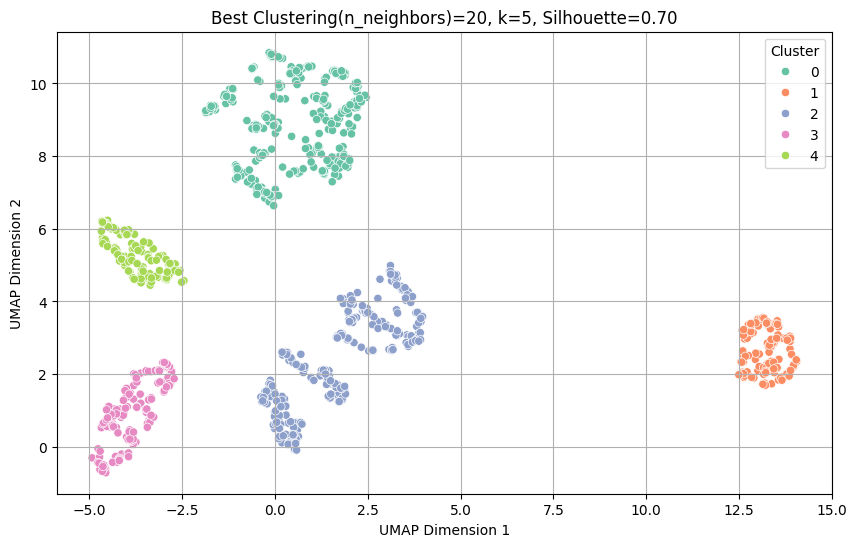

In [350]:
import umap.umap_ as umap
scaler=StandardScaler()
scaled_data= scaler.fit_transform(st)
n_neighbors_range=[5,10,15,20,20,50]
k_range= range(2,20)

best_score = -1
best_n_neighbors=None
best_k=None
best_labels= None
best_embedding_5d= None

for n in n_neighbors_range:
    reducer= umap.UMAP(n_components= 5, n_neighbors= n, random_state=42)
    embedding_5d= reducer.fit_transform(scaled_data)

    for k in k_range: 
        kmeans=KMeans(n_clusters=k, random_state=42)
        labels=kmeans.fit_predict(embedding_5d)
        score = silhouette_score(embedding_5d, labels)
        print(f"n_neighbors={n} , k={k}, Silhouette SCore={score:.4f}")

        if score > best_score:
            best_score=score
            best_n_neighbors= n
            best_k=k
            best_labels= labels
            best_embedding_5d = embedding_5d


print(f"\n Best Silhouette Score:{ best_score:.4f}")
print(f"Best n_neighbors:{best_n_neighbors}")
print(f"Best k: { best_k}")

st['cluster']=best_labels
embedding_2d= umap.UMAP(n_components=2, n_neighbors=best_n_neighbors, random_state=42).fit_transform(scaled_data)

# plot the data 
plt.figure(figsize=(10,6))
sns.scatterplot(x=embedding_2d[:,0], y=embedding_2d[:,-1], hue=best_labels, palette='Set2')
plt.title(f"Best Clustering(n_neighbors)={best_n_neighbors}, k={best_k}, Silhouette={best_score:.2f}")
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title="Cluster")
plt.grid(True)
plt.show()





In [351]:
# checking cluster sizes
st['cluster'].value_counts()


cluster
0    321
2    290
3    153
1    137
4    124
Name: count, dtype: int64

# comparing numeric summary

In [352]:
numeric_summary = st.groupby('cluster').mean()
print(numeric_summary)


         family_history  treatment  work_interfere  remote_work  coworkers  \
cluster                                                                      
0              0.174455   0.006231        0.444444     0.000000   0.470405   
1              0.525547   0.642336        0.615572     0.313869   0.467153   
2              0.372414   0.496552        0.544828     1.000000   0.537931   
3              1.000000   0.993464        0.629630     0.000000   0.490196   
4              0.000000   1.000000        0.602151     0.000000   0.504032   

         supervisor  phys_health_interview  obs_consequence  employer_score  \
cluster                                                                       
0          0.601246               0.387850              1.0        0.355441   
1          0.445255               0.408759              0.0        0.332473   
2          0.596552               0.398276              1.0        0.382574   
3          0.532680               0.316993              1.

In [353]:
# Count categorical values per cluster
for col in ['work_interfere', 'remote_work', 'coworkers']:  # replace with your categorical columns
    print(f"\nColumn: {col}")
    print(st.groupby('cluster')[col].value_counts(normalize=True))



Column: work_interfere
cluster  work_interfere
0        0.666667          0.579439
         0.000000          0.314642
         0.333333          0.071651
         1.000000          0.034268
1        0.666667          0.569343
         1.000000          0.182482
         0.333333          0.160584
         0.000000          0.087591
2        0.666667          0.586207
         0.000000          0.172414
         0.333333          0.131034
         1.000000          0.110345
3        0.666667          0.614379
         0.333333          0.189542
         1.000000          0.156863
         0.000000          0.039216
4        0.666667          0.596774
         0.333333          0.201613
         1.000000          0.137097
         0.000000          0.064516
Name: proportion, dtype: float64

Column: remote_work
cluster  remote_work
0        0              1.000000
1        0              0.686131
         1              0.313869
2        1              1.000000
3        0              1

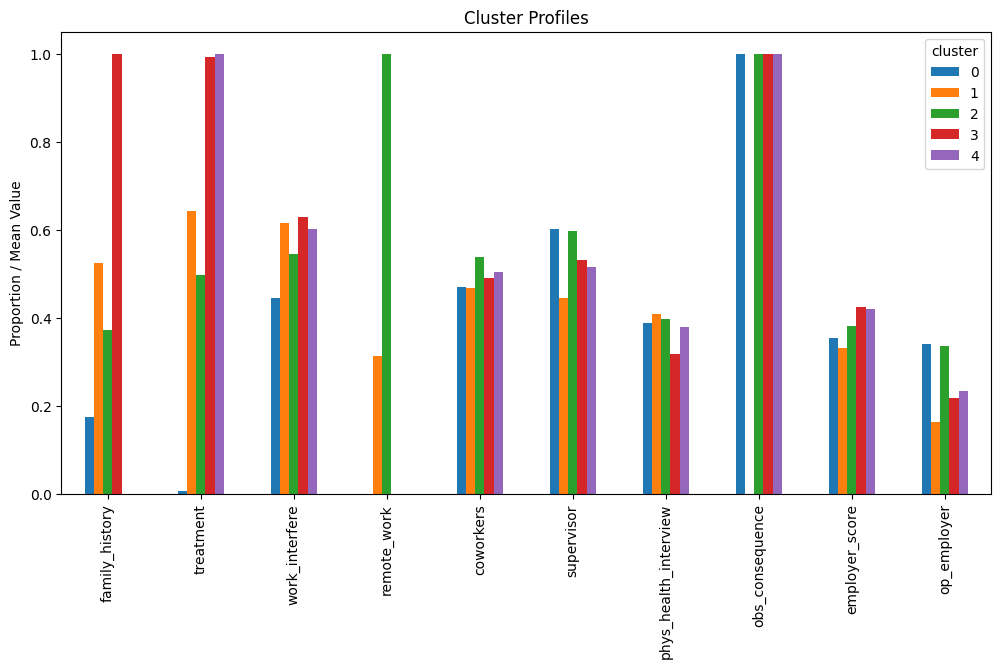

In [354]:
import matplotlib.pyplot as plt

cluster_profile = st.groupby('cluster').mean()

cluster_profile.T.plot(kind='bar', figsize=(12,6))
plt.title('Cluster Profiles')
plt.ylabel('Proportion / Mean Value')
plt.show()


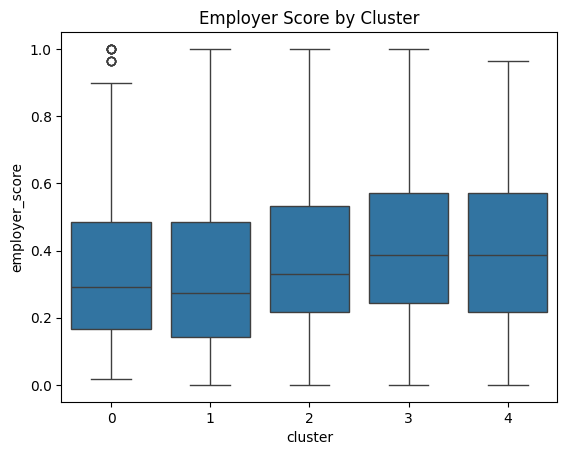

In [355]:
import seaborn as sns

sns.boxplot(x='cluster', y='employer_score', data=st)
plt.title('Employer Score by Cluster')
plt.show()
